# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Import necessary libraries

In [2]:
from fastai.vision.all import *
from fastbook import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

In [3]:
urls = search_images_ddg('iphone', max_images=150)
len(urls)

197

In [4]:
urls2 = search_images_ddg('Samsung phone', max_images=150)
len(urls2)

192

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

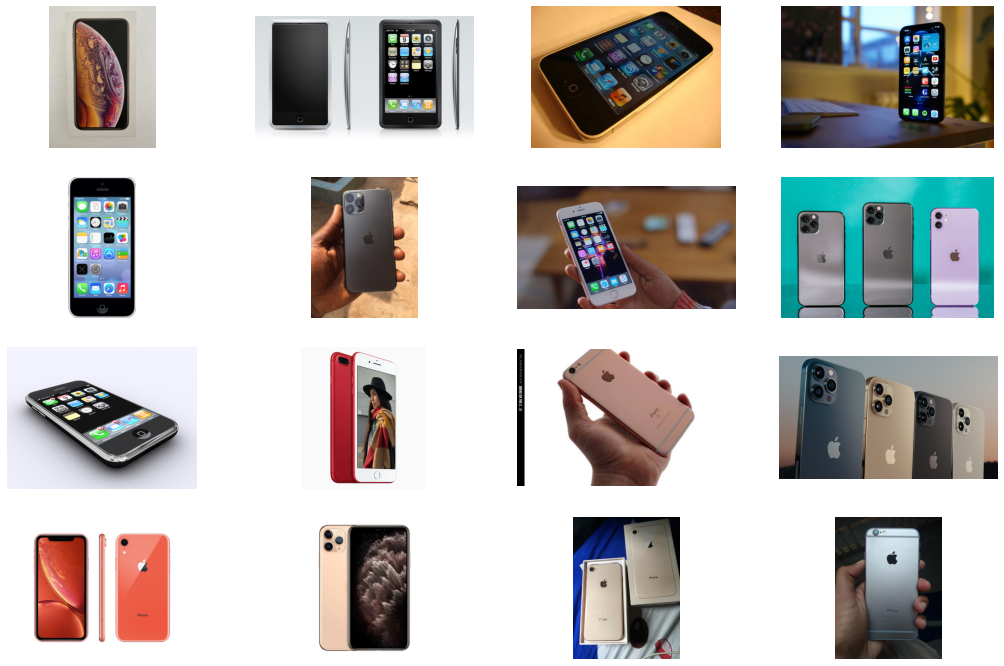

In [5]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls):
    try:
      url = urls[img_i]
      image_data = requests.get(url)
      image_data.raise_for_status()
      
      image = Image.open(BytesIO(image_data.content)) 
      axes[ax_i].imshow(image)
      axes[ax_i].axis("off")
      ax_i += 1
    except requests.exceptions.RequestException as e:
      pass
    finally:
      img_i += 1 

      
plt.show()

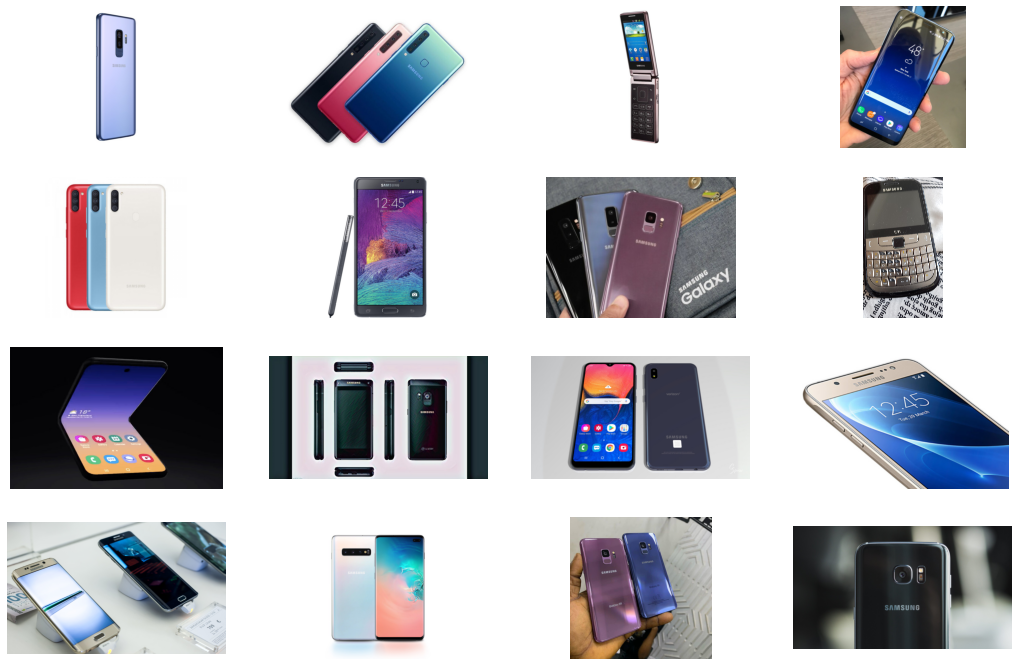

In [6]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls2):
    try:
      url = urls2[img_i]
      image_data = requests.get(url)
      image_data.raise_for_status()
      
      image = Image.open(BytesIO(image_data.content)) 
      axes[ax_i].imshow(image)
      axes[ax_i].axis("off")
      ax_i += 1
    except requests.exceptions.RequestException as e:
      pass
    finally:
      img_i += 1

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [7]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#13) [Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of 01_intro.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of azure_bing_image_search.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of duckduckgo_image_search.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of data_loading_augmentation.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of train_bears (1).ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of train_bears.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of reload-learner.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of cat_vs_dog-filled.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Copy of gradient_descent.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/Untitled')...]

In [8]:
phone_types = 'iphone','samsung'
path = export_path/'Phones'

In [9]:
if not path.exists():
    path.mkdir()
    for o in phone_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} phone', max_images=150)
        download_images(dest, urls=results)

In [10]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#1) [Path('/content/gdrive/MyDrive/Colab Notebooks/Phones/iphone/00000103.jpg')]

In [11]:
failed.map(Path.unlink);



## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

In [12]:
phones = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.20, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(224) # random crop at each iteration, resize to 224x224
)

In [13]:
dls = phones.dataloaders(path)

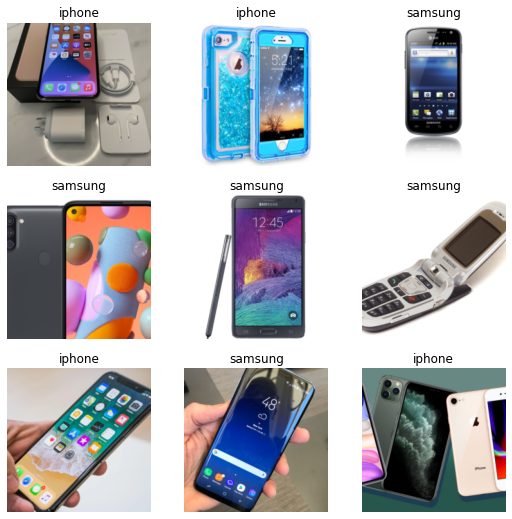

In [14]:
dls.train.show_batch()

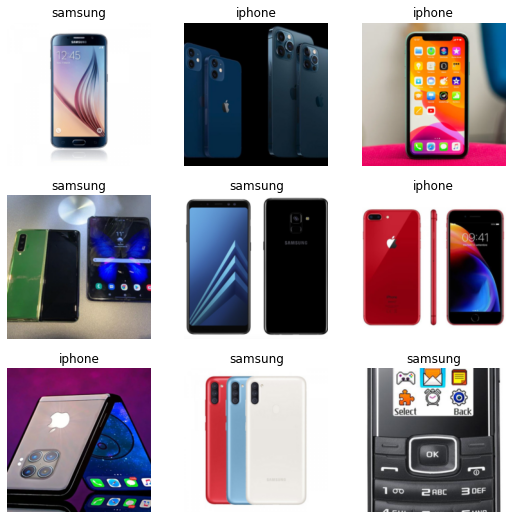

In [15]:
dls.valid.show_batch()

In [16]:
len(dls.valid_ds)

72

In [17]:
len(dls.train_ds)

288

**Question 1:** How many images of each class are in trainging and validation sets?

There should be 60 images in the training set and 240 in training set. Since it takes 20 percent of images for validation.

## 4. Setup cnn learner
Setup a cnn learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)


## 5. Train binary classifier
Fine tune for 10 epochs and show results.

epoch,train_loss,valid_loss,error_rate,time
0,1.219621,0.781570,0.291667,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.790645,0.700731,0.250000,00:16
1,0.690761,0.601098,0.208333,00:16
2,0.555422,0.599393,0.208333,00:16
3,0.445100,0.585196,0.180556,00:16
4,0.363557,0.550643,0.152778,00:16
5,0.303273,0.542660,0.152778,00:16
6,0.256090,0.537000,0.152778,00:16
7,0.220470,0.542373,0.152778,00:16
8,0.191978,0.555259,0.152778,00:16
9,0.167893,0.562924,0.166667,00:16


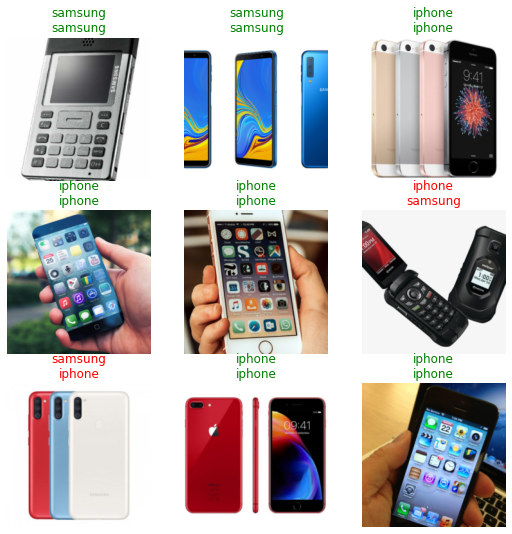

In [19]:
learn.fine_tune(10)
learn.show_results()

**Question 2:** Is the model overfitting? Why, why not?

yes it is overtraining which the train_loss and Valid_loss starts to become higher after epoch 4

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


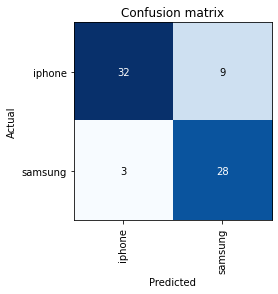

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

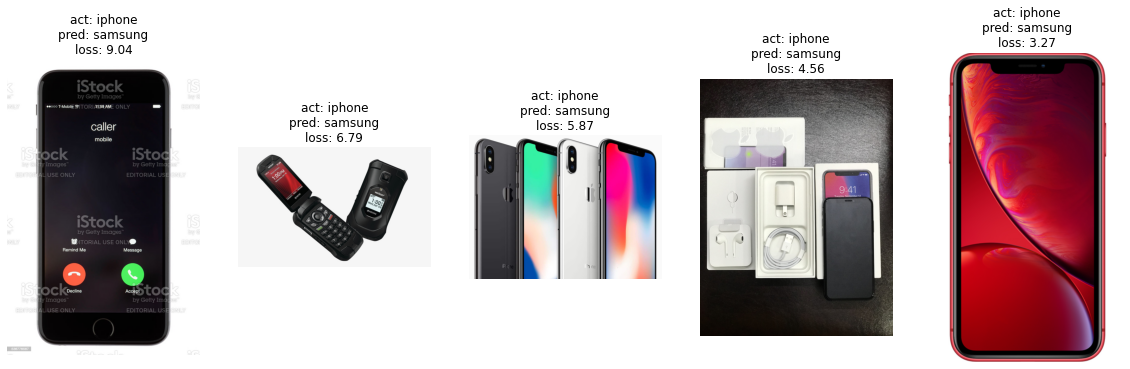

In [21]:
k=5
losses, idxs = interp.top_losses(k)
predicteds = interp.preds[idxs].argmax(axis=1)
fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))

for ax, id, loss, pred in zip(axs, idxs, losses, predicteds):
    img, actual = dls.valid_ds[id]
    img.show(ctx=ax)
    ax.set_title(f'act: {dls.vocab[actual.item()]}\npred: {dls.vocab[pred]}\nloss: {loss:.2f}')

**Question 3:** How many false positive, false negative errors?

*YOUR ANSWER HERE*

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*YOUR ANSWER HERE*

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*YOUR ANSWER HERE*